Построение ассоциативных правил для датасета. 
Можно использовать например apriori, association_rules, fpgrowth из mlxtend.frequent_patterns (работают чуть быстрее). 


In [2]:
!!pip install mlxtend

['Collecting mlxtend',
 '  Downloading mlxtend-0.22.0-py2.py3-none-any.whl (1.4 MB)',
 '     ---------------------------------------- 1.4/1.4 MB 1.0 MB/s eta 0:00:00',
 'Requirement already satisfied: scipy>=1.2.1 in c:\\users\\koshk\\anaconda3\\lib\\site-packages (from mlxtend) (1.9.1)',
 'Requirement already satisfied: joblib>=0.13.2 in c:\\users\\koshk\\anaconda3\\lib\\site-packages (from mlxtend) (1.1.0)',
 'Requirement already satisfied: numpy>=1.16.2 in c:\\users\\koshk\\anaconda3\\lib\\site-packages (from mlxtend) (1.23.5)',
 'Requirement already satisfied: setuptools in c:\\users\\koshk\\anaconda3\\lib\\site-packages (from mlxtend) (63.4.1)',
 'Requirement already satisfied: scikit-learn>=1.0.2 in c:\\users\\koshk\\anaconda3\\lib\\site-packages (from mlxtend) (1.0.2)',
 'Requirement already satisfied: matplotlib>=3.0.0 in c:\\users\\koshk\\anaconda3\\lib\\site-packages (from mlxtend) (3.5.2)',
 'Requirement already satisfied: pandas>=0.24.2 in c:\\users\\koshk\\anaconda3\\lib\\

In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import seaborn as sns
import re
import networkx as nx

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
from mpl_toolkits.mplot3d import Axes3D
from json import JSONEncoder

In [5]:
# импортируем файл с данными из .csv. Выводим 5 строк из файла
DataSet = pd.read_csv('dataset.csv', names = ['set1', 'set2', 'set3', 'set4', 'set5', 'set6', 'set7', 'set8', 
                                              'set9', 'set10', 'set11', 'set12', 'set13', 'set14']) 
DataSet.head(5)

,set1,set2,set3,set4,set5,set6,set7,set8,set9,set10,set11,set12,set13,set14
0,pork,sandwich bags,lunch meat,all- purpose,flour,soda,butter,vegetables,beef,aluminum foil,all- purpose,dinner rolls,shampoo,all- purpose
1,shampoo,hand soap,waffles,vegetables,cheeses,mixes,milk,sandwich bags,laundry detergent,dishwashing liquid/detergent,waffles,individual meals,hand soap,vegetables
2,pork,soap,ice cream,toilet paper,dinner rolls,hand soap,spaghetti sauce,milk,ketchup,sandwich loaves,poultry,toilet paper,ice cream,ketchup
3,juice,lunch meat,soda,toilet paper,all- purpose,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pasta,tortillas,mixes,hand soap,toilet paper,vegetables,vegetables,paper towels,vegetables,flour,vegetables,pork,poultry,eggs


In [6]:
# заменить NAN на пустую строку
DataSet.fillna('', inplace=True)

In [7]:
# выводим 5 строк из файла посмотреть, что вместо NAN пустая строка
DataSet.head(5)

,set1,set2,set3,set4,set5,set6,set7,set8,set9,set10,set11,set12,set13,set14
0,pork,sandwich bags,lunch meat,all- purpose,flour,soda,butter,vegetables,beef,aluminum foil,all- purpose,dinner rolls,shampoo,all- purpose
1,shampoo,hand soap,waffles,vegetables,cheeses,mixes,milk,sandwich bags,laundry detergent,dishwashing liquid/detergent,waffles,individual meals,hand soap,vegetables
2,pork,soap,ice cream,toilet paper,dinner rolls,hand soap,spaghetti sauce,milk,ketchup,sandwich loaves,poultry,toilet paper,ice cream,ketchup
3,juice,lunch meat,soda,toilet paper,all- purpose,,,,,,,,,
4,pasta,tortillas,mixes,hand soap,toilet paper,vegetables,vegetables,paper towels,vegetables,flour,vegetables,pork,poultry,eggs


In [11]:
empty  = []
for i, row in DataSet.iterrows():
    empty.append(row.loc[row != ''].unique().tolist())

In [12]:
#кодируем с пом. TransactionEncoder транзакции в формат, подходящий для Apriori
encoder = TransactionEncoder()
transactions = pd.DataFrame(encoder.fit(empty).transform(empty), columns=encoder.columns_)
display(transactions.head())

,,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,...,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,vegetables,waffles,yogurt
0,False,True,True,False,True,True,False,False,False,True,...,True,False,True,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,True,...,False,True,False,True,False,True,False,False,False,False
3,True,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False


In [13]:
transactions.shape

(1499, 39)

In [14]:
6/len(empty)

0.004002668445630421

In [15]:
frequent_items = apriori(transactions, min_support= 6/len(empty), use_colnames=True, max_len =4)
for i in range(11, 21):
    value = i / 10
    if 1.1 <= value <= 2.0:
        rules = association_rules(frequent_items, metric="lift",  min_threshold = value)
        print(f"Lift = {value}, rules for:{len(rules)} ")

Lift = 1.1, rules for:281316 
Lift = 1.2, rules for:185690 
Lift = 1.3, rules for:116976 
Lift = 1.4, rules for:71008 
Lift = 1.5, rules for:41032 
Lift = 1.6, rules for:22856 
Lift = 1.7, rules for:12348 
Lift = 1.8, rules for:6402 
Lift = 1.9, rules for:3236 
Lift = 2.0, rules for:1530 


In [16]:
frequent_items = apriori(transactions, min_support= 6/len(empty), use_colnames=True, max_len =4)
rules = association_rules(frequent_items, metric="lift",  min_threshold = 1.4)
display(rules.head(10))
print("Rules for: ", len(rules))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"( bagels, all- purpose)",( eggs),0.075384,0.268846,0.029353,0.389381,1.448341,0.009086,1.197397,0.334793
1,"( eggs, all- purpose)",( bagels),0.071381,0.278185,0.029353,0.411215,1.478204,0.009496,1.225939,0.348371
2,( bagels),"( eggs, all- purpose)",0.278185,0.071381,0.029353,0.105516,1.478204,0.009496,1.038161,0.448181
3,( eggs),"( bagels, all- purpose)",0.268846,0.075384,0.029353,0.109181,1.448341,0.009086,1.037940,0.423378
4,"( beef, all- purpose)",( fruits),0.068045,0.263509,0.026017,0.382353,1.451005,0.008087,1.192414,0.333517
5,( fruits),"( beef, all- purpose)",0.263509,0.068045,0.026017,0.098734,1.451005,0.008087,1.034051,0.422032
6,"( all- purpose, mixes)",( hand soap),0.070047,0.237492,0.024016,0.342857,1.443660,0.007381,1.160339,0.330464
7,( hand soap),"( all- purpose, mixes)",0.237492,0.070047,0.024016,0.101124,1.443660,0.007381,1.034573,0.403033
8,"( hand soap, soap)",( all- purpose),0.056037,0.263509,0.020680,0.369048,1.400512,0.005914,1.167269,0.302952
9,( all- purpose),"( hand soap, soap)",0.263509,0.056037,0.020680,0.078481,1.400512,0.005914,1.024355,0.388295


Rules for:  71008


In [17]:
frequent_items

,support,itemsets
0,0.330887,( )
1,0.263509,( all- purpose)
2,0.264176,( aluminum foil)
3,0.278185,( bagels)
4,0.262842,( beef)
...,...,...
59362,0.007338,"( tortillas, waffles, toilet paper, vegetab..."
59363,0.011341,"( tortillas, yogurt, toilet paper, vegetables)"
59364,0.004670,"( tortillas, yogurt, toilet paper, waffles)"
59365,0.016011,"( yogurt, waffles, toilet paper, vegetables)"


<>:21: DeprecationWarning: invalid escape sequence \d
<>:21: DeprecationWarning: invalid escape sequence \d
C:\Users\koshk\AppData\Local\Temp\ipykernel_58480\3615335252.py:21: DeprecationWarning: invalid escape sequence \d
  if re.compile("^[R]\d+$").fullmatch(node) != None:


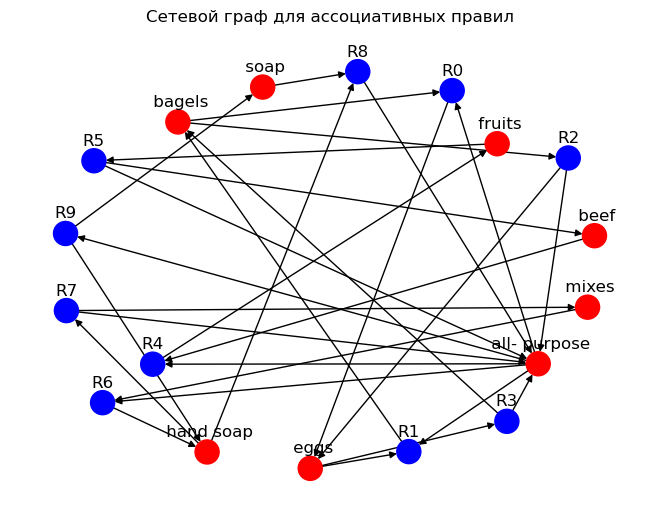

In [20]:
def draw_network(rules, rules_to_show):
  # граф NetworkX
  network = nx.DiGraph()
  
  # перебираем правила(количество правил) для отображения
  for i in range(rules_to_show):
    
    # добавим узел правила
    network.add_nodes_from(["R"+str(i)])
    # добавляем узел-предшественника и ссылку на правило
    for antecedents in rules.iloc[i]['antecedents']: 
        network.add_nodes_from([antecedents])
        network.add_edge(antecedents, "R"+str(i),  weight = 2)
    for consequents in rules.iloc[i]['consequents']:
        network.add_nodes_from([consequents])
        network.add_edge("R"+str(i), consequents,  weight = 2)
  color_map=[]  
  
  # правило - синий цвет, в противном случае - красный.
  for node in network:
       if re.compile("^[R]\d+$").fullmatch(node) != None:
            color_map.append('blue')
       else:
            color_map.append('red')
  
  # Расположение узлов с помощью spring layout
  pos = nx.spring_layout(network, k=16, scale=1)
  # Построение сетевого графа
  nx.draw(network, pos, node_color = color_map, font_size=5)            
  
  # Сдвиг расположения текста вверх
  for p in pos:  
      pos[p][1] += 0.1

  nx.draw_networkx_labels(network, pos)
  plt.title("Сетевой граф для ассоциативных правил")
  plt.show()

draw_network(rules, 10)